# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что она состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

In [1]:
#pip install gensim

     ---------------------------------------- 24.0/24.0 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 58.4/58.4 KB 3.2 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.28
    Uninstalling Cython-0.29.28:
      Successfully uninstalled Cython-0.29.28
Note: you may need to restart the kernel to use updated packages.


### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [6]:
print(texts[0])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

In [7]:
dictionary.token2id.get('sugar')

52

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [8]:
np.random.seed(76543)
# здесь код для построения модели:
lda = models.LdaModel(corpus, num_topics=40, iterations=5)

In [9]:
top_ing = lda.show_topics(num_topics=40, num_words=10, formatted=False)
top_ing

[(0,
  [('668', 0.061551727),
   ('274', 0.052900624),
   ('104', 0.052597594),
   ('15', 0.051344283),
   ('94', 0.041869827),
   ('18', 0.031705923),
   ('29', 0.029107736),
   ('393', 0.027834844),
   ('129', 0.026522959),
   ('158', 0.026518356)]),
 (1,
  [('705', 0.08693839),
   ('991', 0.07730822),
   ('116', 0.063957706),
   ('85', 0.049703028),
   ('333', 0.044116754),
   ('1099', 0.04388017),
   ('623', 0.041150928),
   ('217', 0.033840198),
   ('79', 0.028053593),
   ('194', 0.022534525)]),
 (2,
  [('210', 0.09610807),
   ('59', 0.061000377),
   ('15', 0.037963174),
   ('279', 0.037170395),
   ('104', 0.032096457),
   ('20', 0.031490587),
   ('355', 0.03090875),
   ('500', 0.02462598),
   ('44', 0.021516973),
   ('475', 0.021407114)]),
 (3,
  [('44', 0.06319973),
   ('209', 0.05719227),
   ('31', 0.056782667),
   ('15', 0.055058006),
   ('207', 0.05260301),
   ('3', 0.04349857),
   ('11', 0.043304637),
   ('553', 0.039790854),
   ('194', 0.030815993),
   ('250', 0.030546416)]

In [10]:
ing =["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
ing_id = []
for i in ing:
    ing_id.append(dictionary.token2id.get(i))
ing_id

[15, 52, 29, 82, 729, 9]

In [11]:
words = {}
for topic in top_ing:
    for word in topic[1]:
        if words.get(word[0]) == None:
            words.update({word[0]:1})  
        else:
            words.update({word[0]:(words.get(word[0])+1)})
words            

{'668': 1,
 '274': 1,
 '104': 6,
 '15': 27,
 '94': 1,
 '18': 4,
 '29': 8,
 '393': 1,
 '129': 1,
 '158': 1,
 '705': 1,
 '991': 1,
 '116': 1,
 '85': 1,
 '333': 1,
 '1099': 1,
 '623': 1,
 '217': 1,
 '79': 2,
 '194': 3,
 '210': 1,
 '59': 9,
 '279': 1,
 '20': 6,
 '355': 1,
 '500': 1,
 '44': 13,
 '475': 1,
 '209': 1,
 '31': 1,
 '207': 1,
 '3': 13,
 '11': 6,
 '553': 1,
 '250': 1,
 '114': 3,
 '47': 1,
 '52': 10,
 '204': 2,
 '310': 1,
 '312': 3,
 '13': 3,
 '289': 1,
 '307': 1,
 '56': 1,
 '46': 2,
 '77': 5,
 '700': 1,
 '143': 1,
 '1004': 1,
 '1637': 1,
 '999': 1,
 '69': 2,
 '1413': 1,
 '280': 1,
 '701': 1,
 '534': 1,
 '97': 1,
 '362': 2,
 '27': 3,
 '93': 1,
 '632': 1,
 '997': 1,
 '337': 1,
 '162': 1,
 '23': 1,
 '186': 1,
 '34': 1,
 '216': 1,
 '32': 1,
 '555': 1,
 '876': 1,
 '350': 1,
 '117': 1,
 '6': 2,
 '103': 1,
 '391': 1,
 '145': 1,
 '153': 1,
 '407': 1,
 '1378': 1,
 '1383': 1,
 '588': 1,
 '933': 1,
 '740': 1,
 '414': 1,
 '1444': 1,
 '293': 1,
 '57': 1,
 '73': 1,
 '108': 1,
 '469': 1,
 '839':

In [12]:
counts = []
for i in ing_id:
    counts.append(words.get(str(i)))
counts

[27, 10, 8, None, None, 3]

In [13]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [14]:
import copy
dictionary2 = copy.deepcopy(dictionary)

In [15]:
#dictionary2.dfs

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [16]:
more_4000_times = [k for k, v in dictionary2.dfs.items() if v >= 4000]
more_4000_times

[3, 5, 15, 11, 18, 20, 29, 44, 52, 59, 104, 114]

In [17]:
dict_size_before = len(dictionary2)
dict_size_before

6714

In [18]:
dictionary2.filter_tokens(more_4000_times)

In [19]:
dict_size_after = len(dictionary2)
dict_size_after

6702

In [21]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  

In [22]:
corpus_size_before = 0
for text in corpus:
    corpus_size_before += len(text)

corpus_size_after = 0
for text in corpus2:
    corpus_size_after += len(text)

print('corp before: ', corpus_size_before, ', corp after: ', corpus_size_after)

corp before:  428249 , corp after:  343665


In [23]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [24]:
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.LdaModel(corpus2, num_topics=40, iterations=5)

In [25]:
coher1 = lda.top_topics(corpus=corpus, dictionary=dictionary)

In [26]:
coherence1 = np.mean( [coh[1] for coh in lda.top_topics(corpus=corpus, dictionary=dictionary)] )
print(coherence1)

-5.316018721763305


In [27]:
coher1_mean = []
for topic in coher1:
    #print(topic)
    tmp=[]
    for k in topic[0]:
        #print(k)
        tmp.append(k[0])
    coher1_mean.append(sum(tmp)/len(tmp))
sum(coher1_mean)/len(coher1_mean)

0.031753342822194094

In [28]:
coher2 = lda2.top_topics(corpus=corpus2, dictionary=dictionary2)

In [29]:
coherence2 = np.mean( [coh[1] for coh in lda2.top_topics(corpus=corpus2, dictionary=dictionary2)] )
print(coherence2)

-8.978687777035283


In [30]:
coher2_mean = []
for topic in coher2:
    #print(topic)
    tmp=[]
    for k in topic[0]:
        #print(k)
        tmp.append(k[0])
    coher2_mean.append(sum(tmp)/len(tmp))
sum(coher2_mean)/len(coher2_mean)

0.03275301447603852

In [31]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [35]:
corpus2

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(7, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(23, 1)],
 [(10, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(7, 1),
  (10, 1),
  (11, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(24, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(7, 1), (39, 1), (44, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(4, 1),
  (48, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(47, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(0, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(70, 1),
  (79, 1),
  (80, 1),
  (81, 

In [54]:
matrix2 = lda2.get_document_topics(corpus2[0])
matrix2

[(13, 0.12961936), (15, 0.12943296), (31, 0.62532026)]

Также выведите содержимое переменной *.alpha* второй модели:

In [36]:
lda2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [37]:
np.random.seed(76543)
# здесь код для построения модели:
lda3 = models.LdaModel(corpus2, num_topics=40, iterations=5, alpha=1, passes=5)

In [57]:
s3 = 0
count3=[]
for topics in corpus2:
    count3.append(len(lda3.get_document_topics(topics, minimum_probability=0.01)))

for el in count3:
    s3 += el
print(s3)

s2 = 0
count2=[]
for topics in corpus2:
    count2.append(len(lda2.get_document_topics(topics, minimum_probability=0.01)))

for el in count2:
    s2 += el
print(s2)

1590960
194076


In [ ]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [78]:
X = np.zeros((len(recipes), 40))
for idoc in range(len(corpus2)):
    probdict = lda2.get_document_topics(corpus2[idoc])
    for topic in probdict:
        key = topic[0]
        X[idoc, key] = topic[1]
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.0135472  0.05713416]
 [0.         0.         0.         ... 0.         0.         0.25786415]]


In [70]:
y = [rep['cuisine'] for rep in recipes]

In [81]:
rf_clf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf_clf, X, y, cv=3)
score

array([0.54963041, 0.54495399, 0.54223865])

In [82]:
score.mean()

0.5456076834112736

In [ ]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [84]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [86]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [87]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [88]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

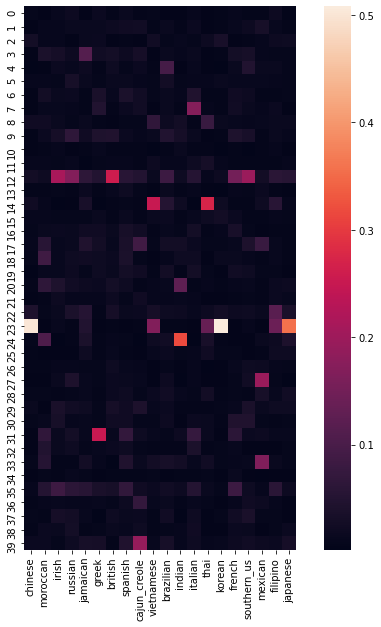

In [90]:
# Визуализируйте матрицу
topicc_matrix = compute_topic_cuisine_matrix(lda2, corpus2, recipes)
plot_matrix(topicc_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 